In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
x_train=data.drop(columns=["median_house_value"])
y_train=data["median_house_value"]

In [5]:
data.fillna(data.mean(), inplace=True)

In [6]:
from sklearn.linear_model import LinearRegression as LR
linear_regression_model=LR()
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [7]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]
-3620600.8929739078


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

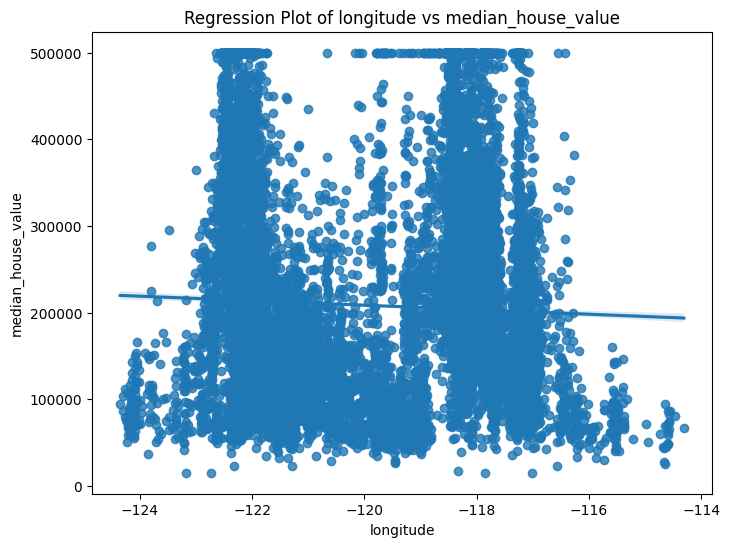

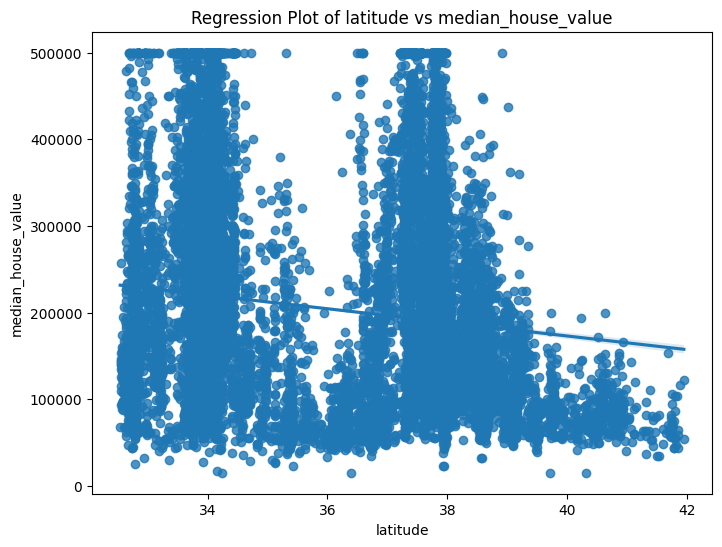

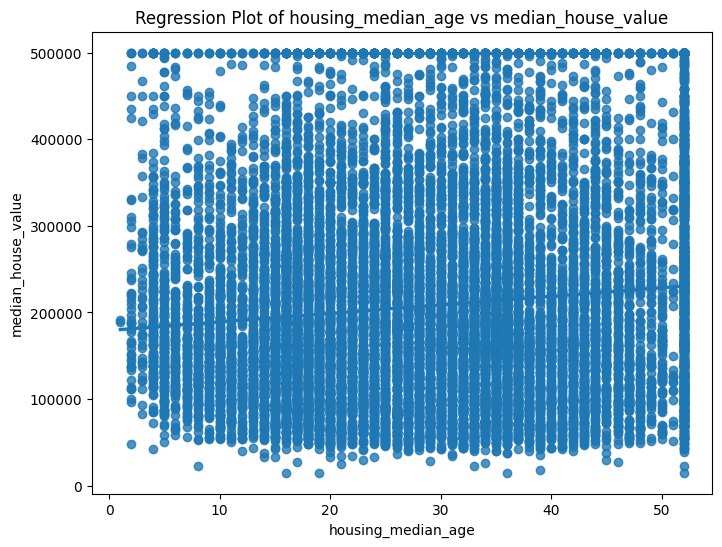

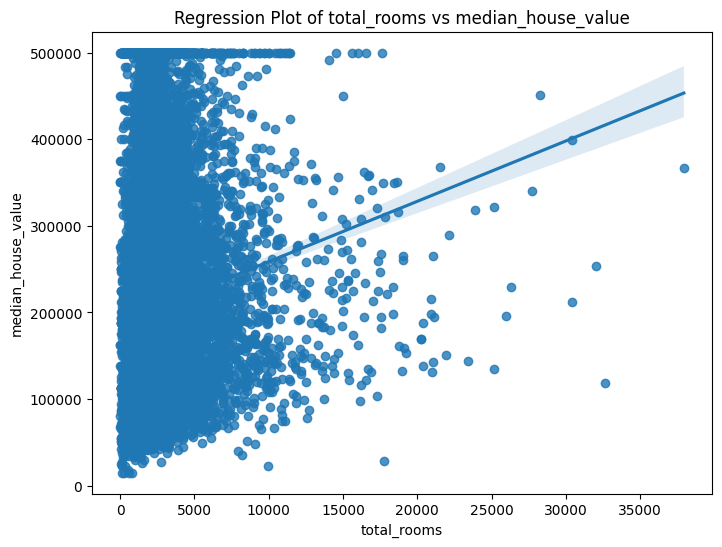

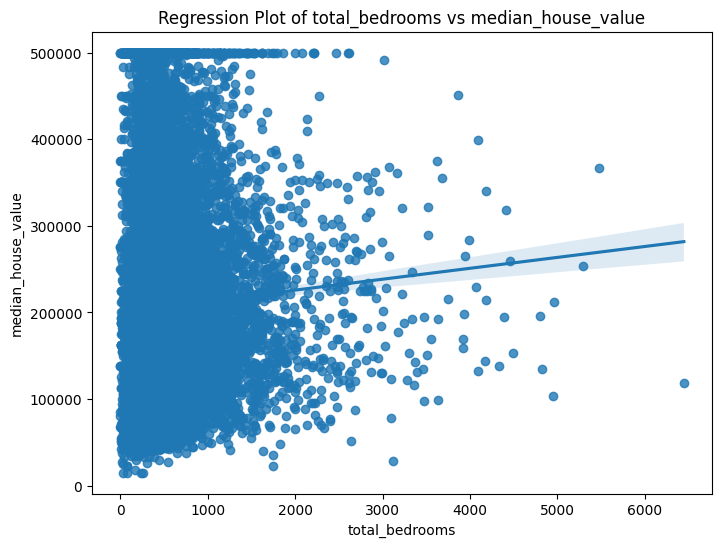

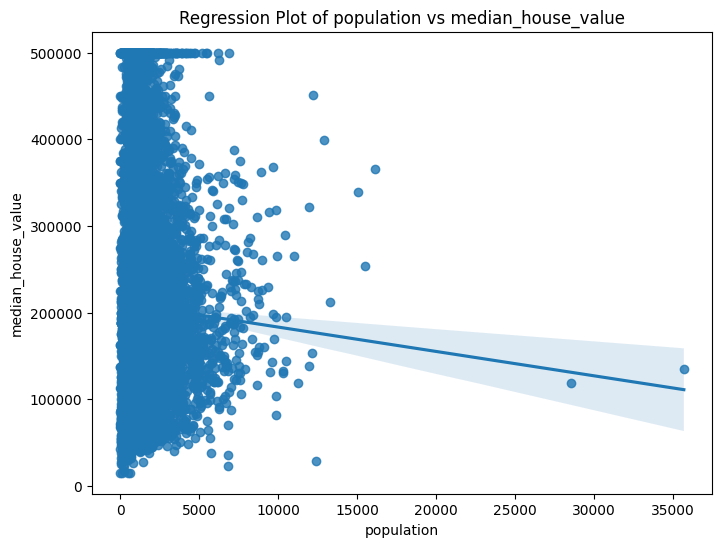

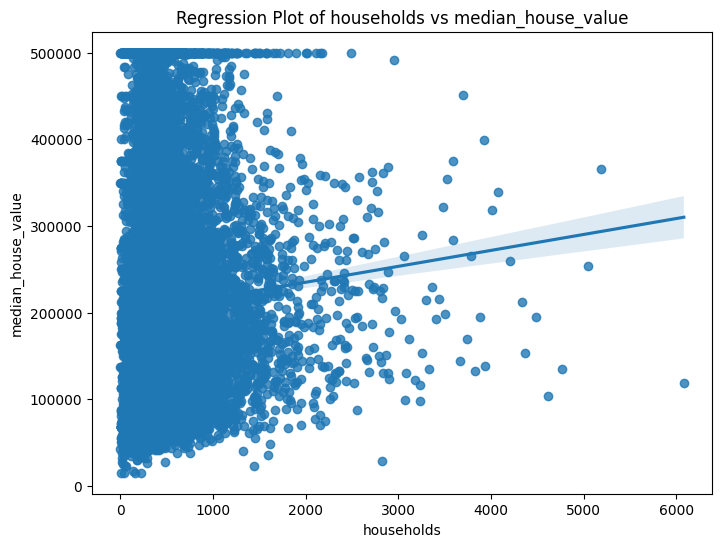

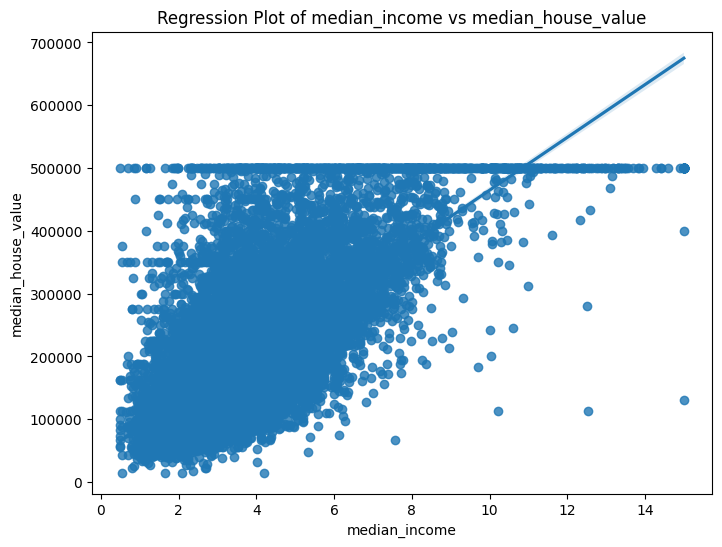

In [9]:
for col in data.columns:
  if col != 'median_house_value':
    plt.figure(figsize=(8,6))
    sns.regplot(x=data[col],y=data['median_house_value'])
    plt.xlabel(col)
    plt.ylabel("median_house_value")
    plt.title(f"Regression Plot of {col} vs median_house_value")
    plt.show()

In [10]:
data_test=pd.read_csv("/content/sample_data/california_housing_test.csv")
x_test=data_test.drop(columns=["median_house_value"])
y_test=data_test["median_house_value"]

In [11]:
yhat=linear_regression_model.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,yhat)
mse

4867205486.928806

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, yhat)
r2

0.6195057678312047

In [14]:
from sklearn.tree import DecisionTreeRegressor as dtr
model_decision_tree=dtr()
model_decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [15]:
y_pred=model_decision_tree.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mse

4523434892.507334

In [16]:
r2=r2_score(y_test,y_pred)
r2

0.6463800653552948

In [17]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest=RandomForestRegressor()
model_random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
y_pred_random=model_random_forest.predict(x_test)
mse=mean_squared_error(y_test,y_pred_random)
mse

2437745855.1836762

In [19]:
r2=r2_score(y_test,y_pred_random)
r2

0.809428995779659

In [ ]:
## Using a quadratic function

In [20]:
prediction_quad = pd.DataFrame(index=x_test.index)

for col in x_train.columns:
    f = np.polyfit(x_train[col], y_train, 2)
    prediction_quad[col] = np.polyval(f, x_test[col])

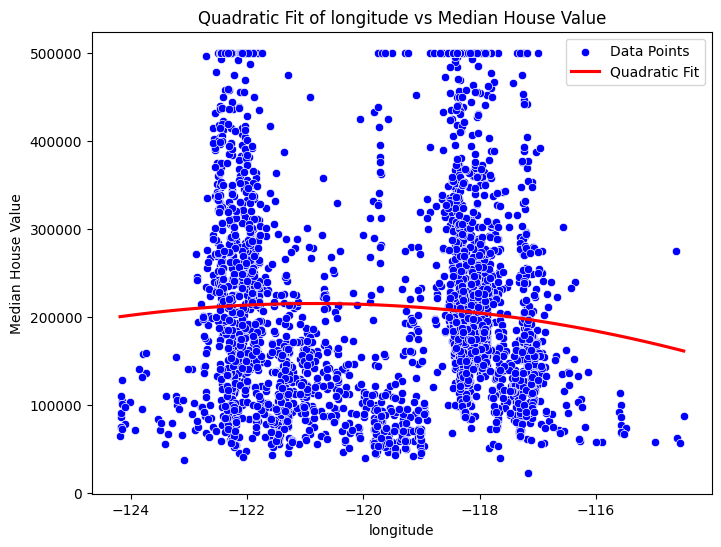

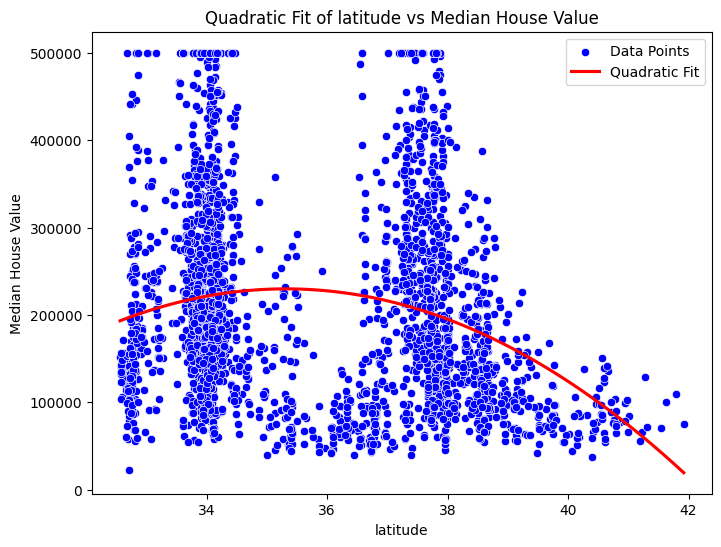

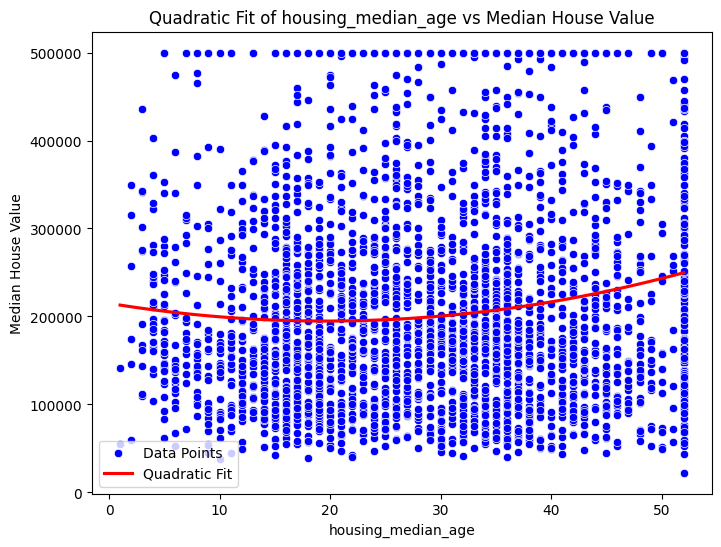

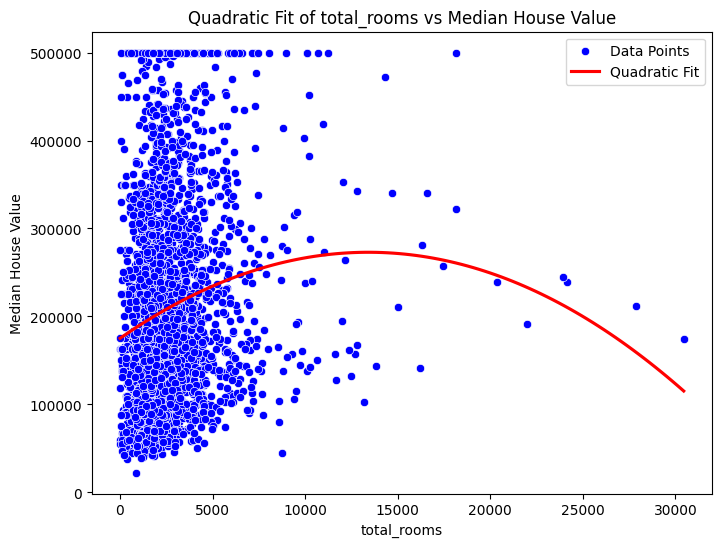

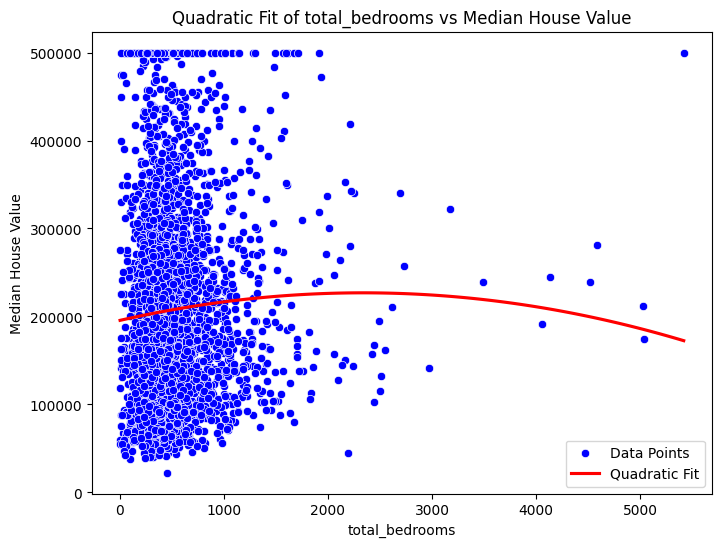

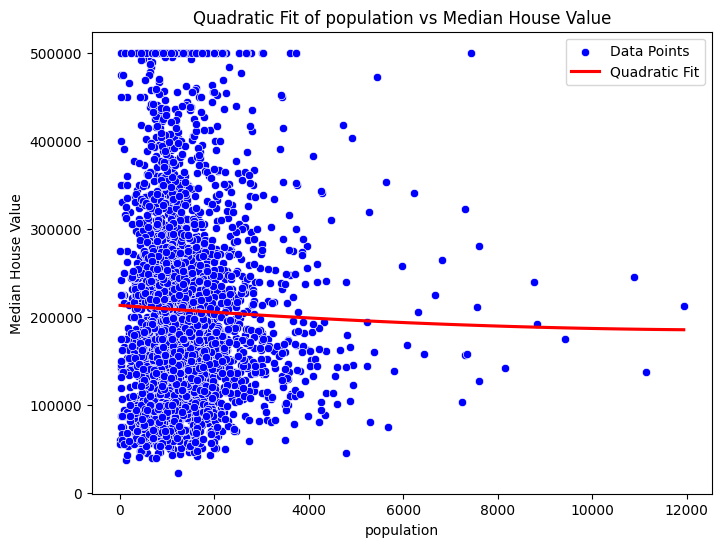

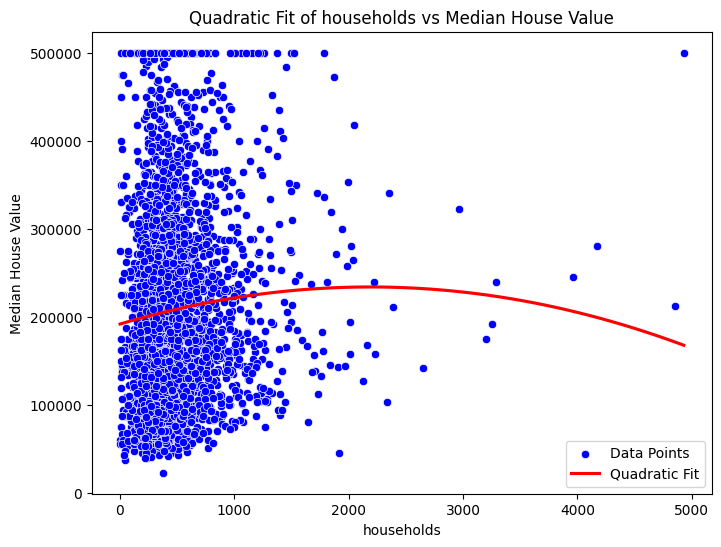

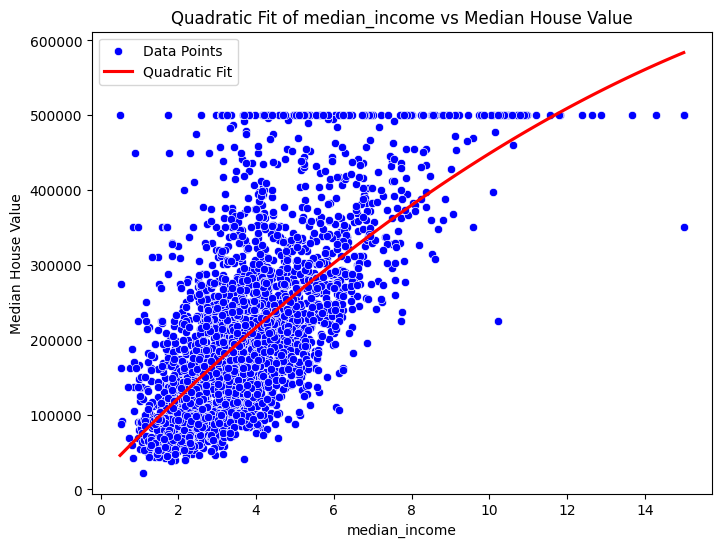

In [21]:
for col in prediction_quad.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_test[col], y=y_test, color='blue', label='Data Points')
    sns.regplot(x=x_test[col], y=prediction_quad[col], order=2, scatter=False, color='red', label='Quadratic Fit')
    plt.xlabel(col)
    plt.ylabel("Median House Value")
    plt.title(f"Quadratic Fit of {col} vs Median House Value")
    plt.legend()
    plt.show()

In [22]:
x_test_single = x_test.iloc[0]
prediction_single = pd.Series(index=x_train.columns)
for col in x_train.columns:
    f = np.polyfit(x_train[col], y_train, 2)
    prediction_single[col] = np.polyval(f, x_test_single[col])

yhat_single = prediction_single.mean()

In [23]:
yhat_all = [yhat_single] * len(y_test)
mse = mean_squared_error(y_test, yhat_all)
mse

13156086039.732763

In [24]:
r2 = r2_score(y_test, yhat_all)
r2

-0.028478224204456337

In [ ]:
# Implementing a cubic function

In [25]:
prediction_3 = pd.DataFrame(index=x_test.index)

for col in x_train.columns:
    f = np.polyfit(x_train[col], y_train, 3)
    prediction_3[col] = np.polyval(f, x_test[col])

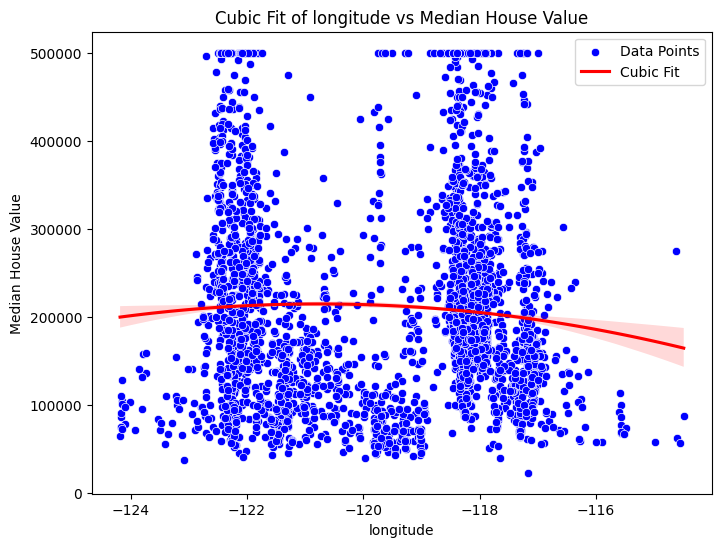

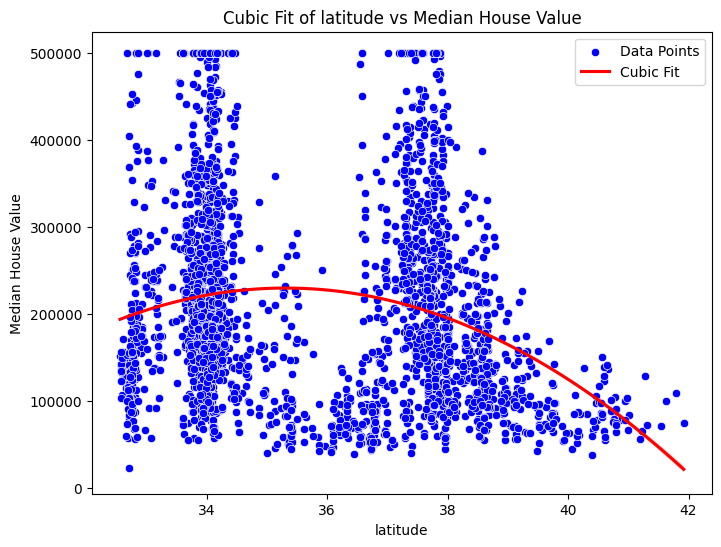

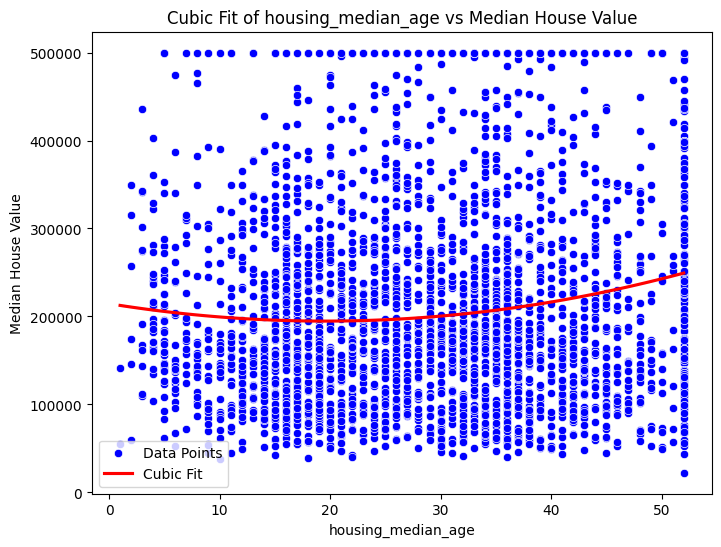

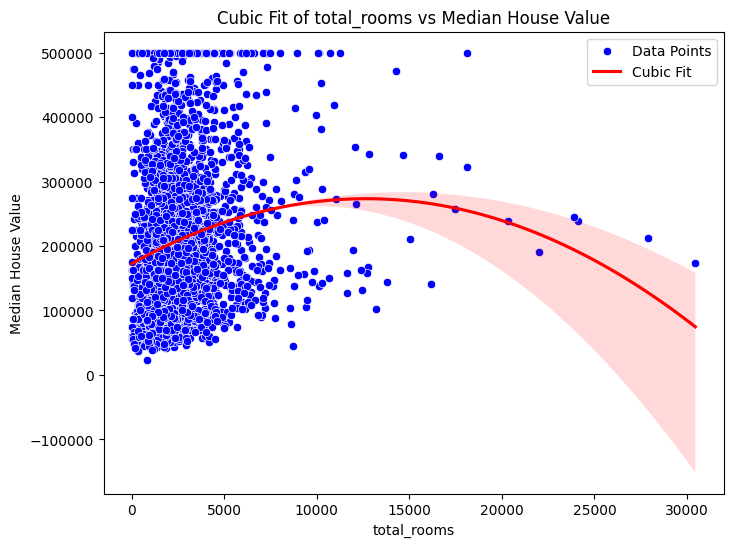

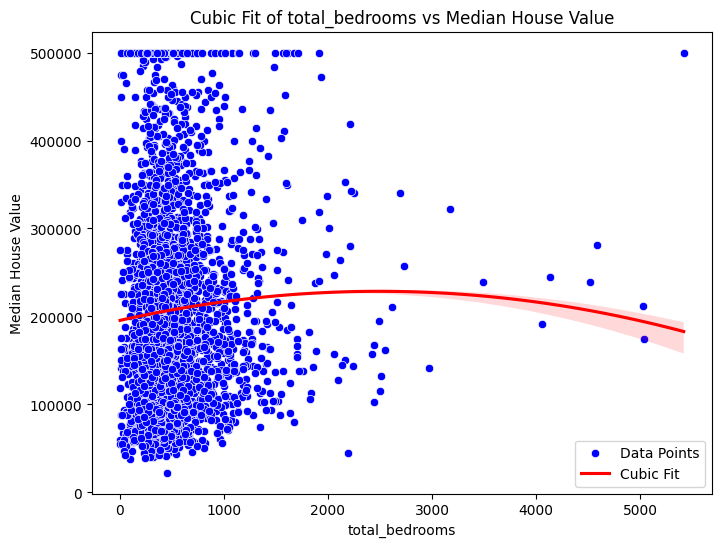

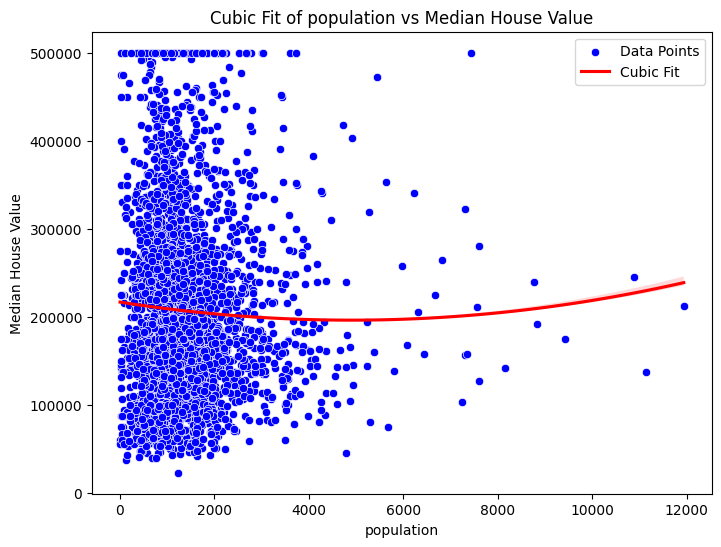

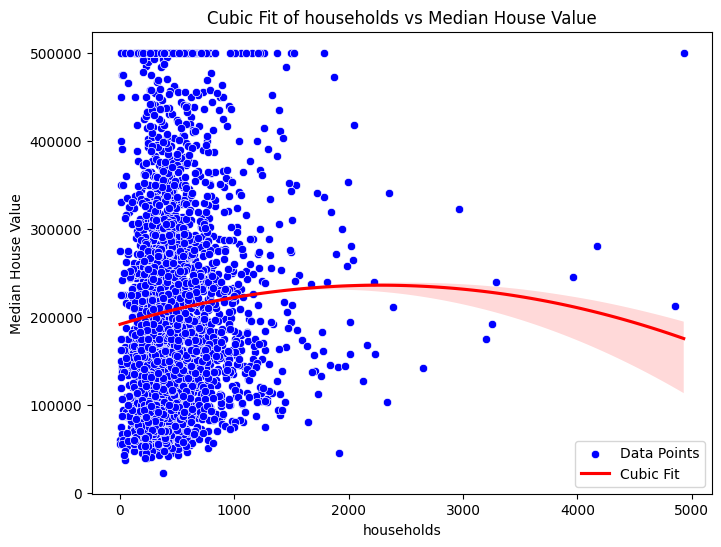

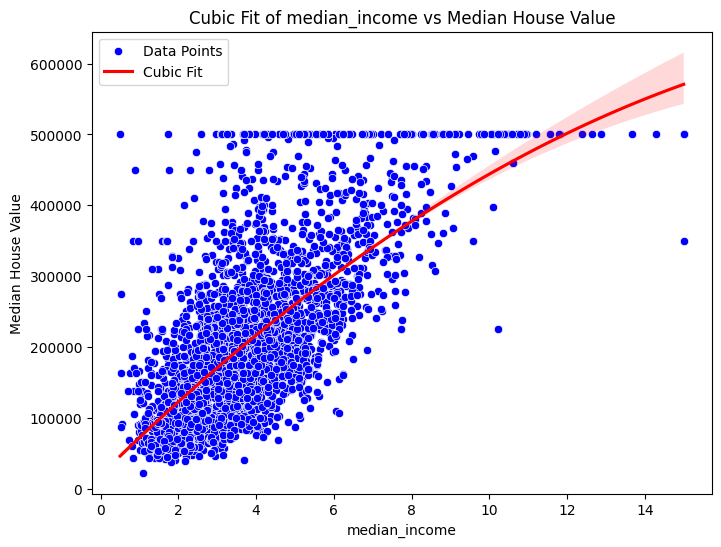

In [26]:
for col in prediction_3.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_test[col], y=y_test, color='blue', label='Data Points')
    sns.regplot(x=x_test[col], y=prediction_3[col], order=2, scatter=False, color='red', label='Cubic Fit')
    plt.xlabel(col)
    plt.ylabel("Median House Value")
    plt.title(f"Cubic Fit of {col} vs Median House Value")
    plt.legend()
    plt.show()

In [27]:
x_test_single = x_test.iloc[0]
prediction_single = pd.Series(index=x_train.columns)
for col in x_train.columns:
    f = np.polyfit(x_train[col], y_train, 3)
    prediction_single[col] = np.polyval(f, x_test_single[col])

yhat_single = prediction_single.mean()

In [28]:
yhat_all = [yhat_single] * len(y_test)
mse = mean_squared_error(y_test, yhat_all)
mse

13220816773.918839

In [29]:
r2 = r2_score(y_test, yhat_all)
r2

-0.03353855524410476

In [ ]:
# Implementing a neural network

In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [31]:
model = Sequential([
    Dense(35000, activation='relu'),
    Dense(3200, activation='relu'),
    Dense(1400,activation='relu'),
    Dense(1)
  ])

In [32]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
model.fit(x_train,y_train)

532/532 ━━━━━━━━━━━━━━━━━━━━ 1240s 2s/step - loss: 17499979776.0000 - mae: 98513.4219


In [33]:
y_pred=model.predict(x_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 407ms/step


In [34]:
mse_neural=mean_squared_error(y_test,y_pred)
mse_neural

8875168105.642591

In [35]:
r2_neural=r2_score(y_test,y_pred)
r2_neural

0.30618292513137635